In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [20]:
conn = sqlite3.connect(r'C:\Users\delluser\Downloads\sakila (1).db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [21]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [23]:
df.shape #do not use parenthesis for sql

(16044, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [25]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


<AxesSubplot:>

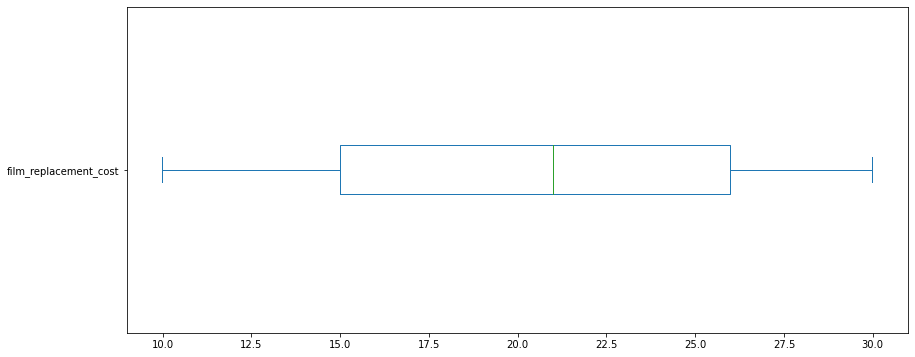

In [28]:
df['film_replacement_cost'].plot(kind = 'box', vert = False, figsize = (14,6))

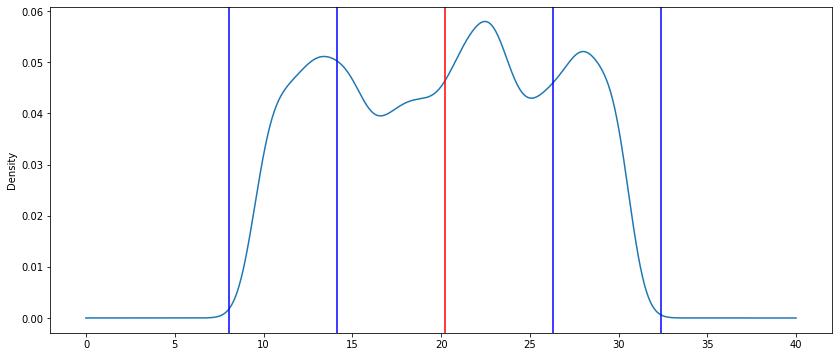

In [36]:
df1 = df['film_replacement_cost'].plot(kind = 'density', figsize = (14,6))
df1.axvline(df['film_replacement_cost'].mean(), color = 'red')
df1.axvline((df['film_replacement_cost'].mean() - df['film_replacement_cost'].std()), color = 'blue')
df1.axvline((df['film_replacement_cost'].mean() + df['film_replacement_cost'].std()), color = 'blue')
df1.axvline((df['film_replacement_cost'].mean() - (2 *df['film_replacement_cost'].std())), color = 'blue')
df1.axvline((df['film_replacement_cost'].mean() + (2 *df['film_replacement_cost'].std())), color = 'blue')

In [42]:
df['film_replacement_cost'].describe()

count    16044.000000
mean        20.215443
std          6.081771
min          9.990000
25%         14.990000
50%         20.990000
75%         25.990000
max         29.990000
Name: film_replacement_cost, dtype: float64

In [43]:
df['film_replacement_cost'].mean() - df['film_replacement_cost'].std()

14.13367113813959

In [44]:
df['film_replacement_cost'].mean() + df['film_replacement_cost'].std()

26.29721392792873

In [45]:
df['film_replacement_cost'].mean() - (2 *df['film_replacement_cost'].std())

8.051899743245018

In [46]:
df['film_replacement_cost'].mean() + (2 *df['film_replacement_cost'].std())

32.378985322823304

In [47]:
df['film_replacement_cost'].mean() - (3 *df['film_replacement_cost'].std())

1.9701283483504461

<AxesSubplot:ylabel='Density'>

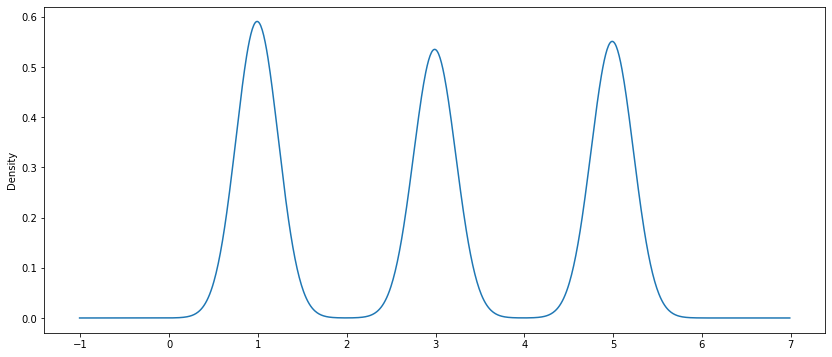

In [48]:
df['film_rental_rate'].plot(kind='density', figsize = (14,6))

In [49]:
df['film_rental_rate'].value_counts()

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

In [50]:
df['film_rental_duration'].describe()

count    16044.00000
mean         4.93549
std          1.40169
min          3.00000
25%          4.00000
50%          5.00000
75%          6.00000
max          7.00000
Name: film_rental_duration, dtype: float64

In [56]:
df['film_rental_duration'].head()

rental_id
1    7
2    7
3    7
4    6
5    5
Name: film_rental_duration, dtype: int64

In [59]:
df[['film_rental_duration','film_rental_rate']]

,film_rental_duration,film_rental_rate
rental_id,,
1,7,2.99
2,7,2.99
3,7,2.99
4,6,0.99
5,5,2.99
...,...,...
16045,5,0.99
16046,6,0.99
16047,4,0.99


In [60]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [65]:
df['rental_gain_return'] = df['film_rental_rate']/df['film_replacement_cost']*100

In [67]:
df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

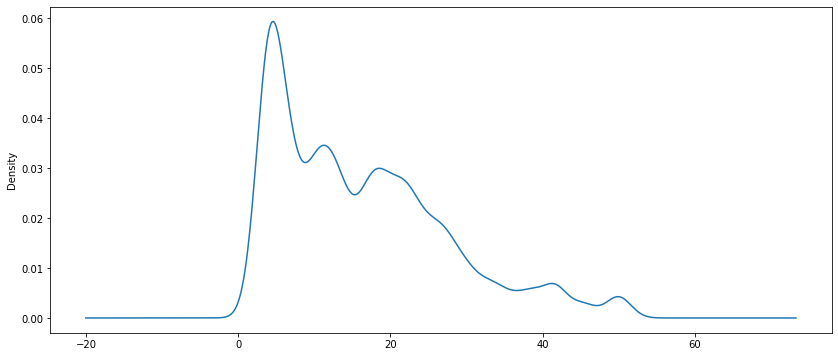

In [69]:
df['rental_gain_return'].plot(kind='density', figsize=(14,6))

In [71]:
df['rental_gain_return'].describe()

count    16044.000000
mean        16.343824
std         11.405159
min          3.301100
25%          6.191370
50%         13.597090
75%         23.017706
max         49.949950
Name: rental_gain_return, dtype: float64

In [73]:
df.loc[df['rental_gain_return']>49]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,49.94995
61,2005-05-25 09:01:57,2005-06-02 07:22:57,FOWLER,1,Lethbridge,TRUMAN CRAZY,7,4.99,9.99,G,49.94995
162,2005-05-26 02:02:05,2005-05-27 03:38:05,HALE,1,Lethbridge,EDGE KISSING,5,4.99,9.99,NC-17,49.94995
163,2005-05-26 02:26:23,2005-06-04 06:36:23,GRAHAM,1,Lethbridge,KISSING DOLLS,3,4.99,9.99,R,49.94995
197,2005-05-26 06:59:21,2005-06-03 05:04:21,KNOTT,2,Woodridge,TRUMAN CRAZY,7,4.99,9.99,G,49.94995
...,...,...,...,...,...,...,...,...,...,...,...
15877,2005-08-23 16:33:33,2005-08-26 10:36:33,BANDA,2,Woodridge,KISSING DOLLS,3,4.99,9.99,R,49.94995
15947,2005-08-23 18:54:32,2005-08-24 22:39:32,GREY,1,Lethbridge,HEARTBREAKERS BRIGHT,3,4.99,9.99,G,49.94995
15998,2005-08-23 20:41:09,2005-08-27 00:20:09,NOLAND,1,Lethbridge,EDGE KISSING,5,4.99,9.99,NC-17,49.94995


In [74]:
df['film_title'].describe()

count                  16044
unique                   958
top       BUCKET BROTHERHOOD
freq                      34
Name: film_title, dtype: object

In [79]:
df['film_title'].value_counts()

BUCKET BROTHERHOOD    34
ROCKETEER MOTHER      33
FORWARD TEMPLE        32
JUGGLER HARDLY        32
SCALAWAG DUCK         32
                      ..
MANNEQUIN WORST        5
BUNCH MINDS            5
MIXED DOORS            4
TRAIN BUNCH            4
HARDLY ROBBERS         4
Name: film_title, Length: 958, dtype: int64

In [80]:
df['film_title'].value_counts().max()

34

In [83]:
df['film_title'].value_counts().min()

4

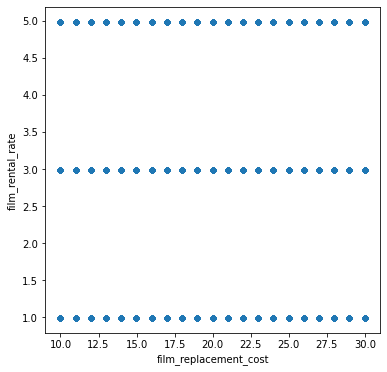

In [88]:
scatter = df.plot(kind = 'scatter', x = 'film_replacement_cost', y = 'film_rental_rate', figsize =(6,6))

In [89]:
corr = df.corr()
corr

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost,rental_gain_return
store_id,1.000000,0.012531,-0.014760,-0.021766,-0.005670
film_rental_duration,0.012531,1.000000,0.035932,-0.026174,0.046913
film_rental_rate,-0.014760,0.035932,1.000000,-0.064853,0.824784
film_replacement_cost,-0.021766,-0.026174,-0.064853,1.000000,-0.520978
rental_gain_return,-0.005670,0.046913,0.824784,-0.520978,1.000000


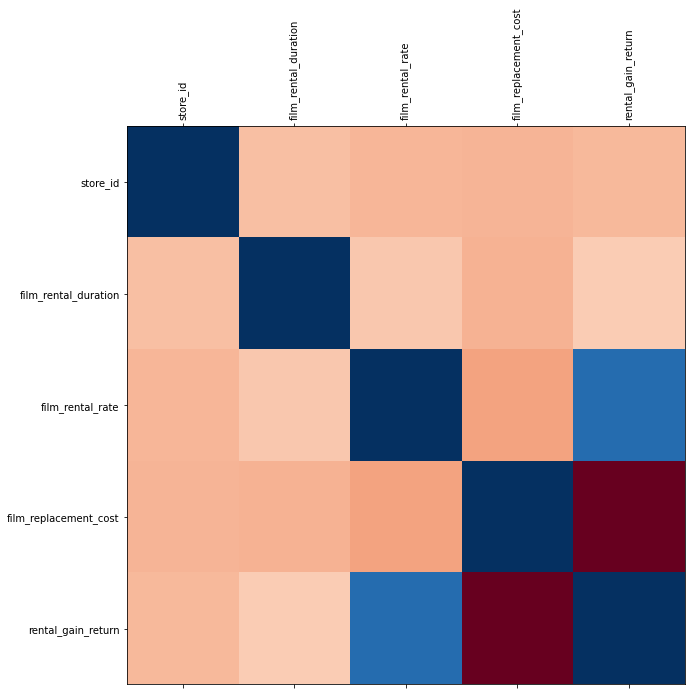

In [90]:
fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [92]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797